In [1]:
!pip install pygad

  Obtaining dependency information for pygad from https://files.pythonhosted.org/packages/83/02/a8431f1d526eef71d709792d8721b18aa2f1bdbdcba43bd2dcf1df5cae18/pygad-3.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/83.1 kB ? eta -:--:--
   ---------------------------------------- 83.1/83.1 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\PedroVictorRodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
c:\Users\PedroVictorRodrigues\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


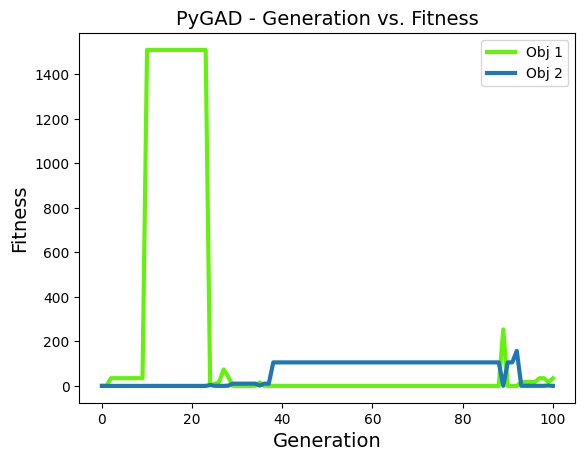

Parameters of the best solution : [ 2.61328365 -5.35259918 -5.37776469  1.63555872 -3.69273471  0.24754596]
Fitness value of the best solution = [33.9730959   0.53310464]
Predicted output 1 based on the best solution : 49.97056594342213
Predicted output 2 based on the best solution : 31.87580334675931


In [2]:
import pygad
import numpy

"""
Given these 2 functions:
    y1 = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    y2 = f(w1:w6) = w1x7 + w2x8 + w3x9 + w4x10 + w5x11 + 6wx12
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=50
    and   (x7,x8,x9,x10,x11,x12)=(-2,0.7,-9,1.4,3,5) and y=30
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize these 2 functions.
This is a multi-objective optimization problem.

PyGAD considers the problem as multi-objective if the fitness function returns:
    1) List.
    2) Or tuple.
    3) Or numpy.ndarray.
"""

function_inputs1 = [4,-2,3.5,5,-11,-4.7] # Function 1 inputs.
function_inputs2 = [-2,0.7,-9,1.4,3,5] # Function 2 inputs.
desired_output1 = 50 # Function 1 output.
desired_output2 = 30 # Function 2 output.

def fitness_func(ga_instance, solution, solution_idx):
    output1 = numpy.sum(solution*function_inputs1)
    output2 = numpy.sum(solution*function_inputs2)
    fitness1 = 1.0 / (numpy.abs(output1 - desired_output1) + 0.000001)
    fitness2 = 1.0 / (numpy.abs(output2 - desired_output2) + 0.000001)
    return [fitness1, fitness2]

num_generations = 100
num_parents_mating = 10

sol_per_pop = 20
num_genes = len(function_inputs1)

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       parent_selection_type='nsga2')

ga_instance.run()

ga_instance.plot_fitness(label=['Obj 1', 'Obj 2'])

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")

prediction = numpy.sum(numpy.array(function_inputs1)*solution)
print(f"Predicted output 1 based on the best solution : {prediction}")
prediction = numpy.sum(numpy.array(function_inputs2)*solution)
print(f"Predicted output 2 based on the best solution : {prediction}")